In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from numpy import arange
import math
from scipy.optimize import curve_fit
import utm

In [7]:
gpswalkingf = pd.read_csv('moving_free-gps.csv')
gpsstaticf = pd.read_csv('static_free-gps.csv')
gpswalkingo = pd.read_csv('moving_occ-gps.csv')
gpsstatico = pd.read_csv('static_occ-gps.csv')

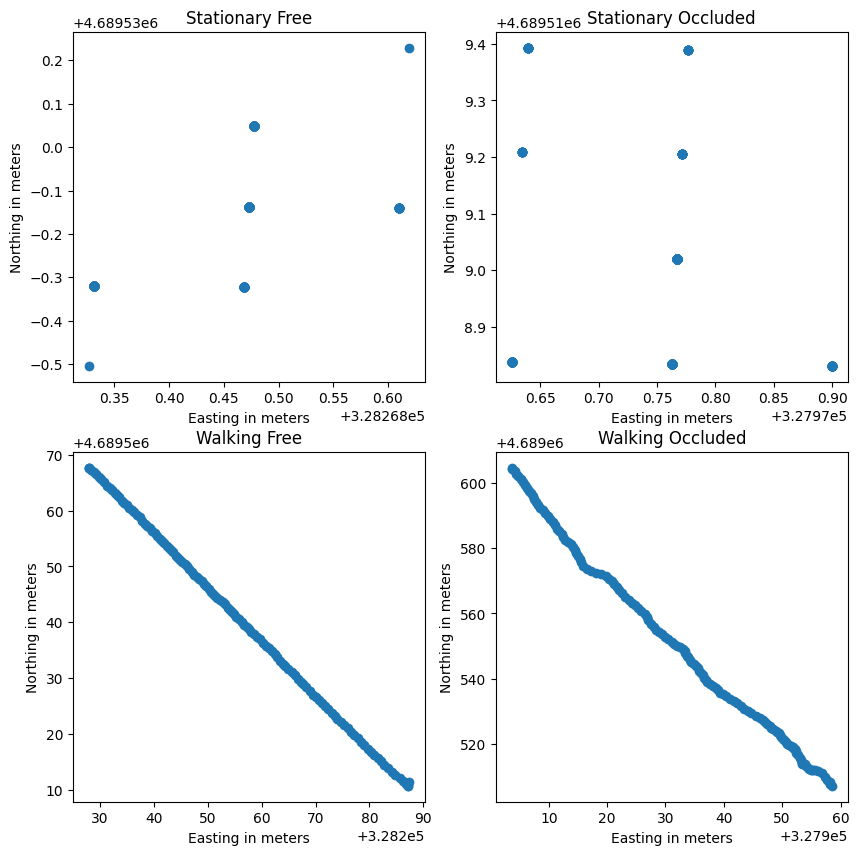

In [102]:
fig , axis = plt.subplots(2,2,figsize = (10,10))
axis[0,0].scatter(x=gpsstaticf[".UTM_easting"][1:], y=gpsstaticf[".UTM_northing"][1:])
axis[0,0].set_title("Stationary Free")
axis[0,0].set_xlabel("Easting in meters")
axis[0,0].set_ylabel("Northing in meters")

axis[0,1].scatter(x=gpsstatico[".UTM_easting"][1:], y=gpsstatico[".UTM_northing"][1:])
axis[0,1].set_title("Stationary Occluded")
axis[0,1].set_xlabel("Easting in meters")
axis[0,1].set_ylabel("Northing in meters")

axis[1,0].scatter(x=gpswalkingf[".UTM_easting"][1:], y=gpswalkingf[".UTM_northing"][1:])
axis[1,0].set_title("Walking Free")
axis[1,0].set_xlabel("Easting in meters")
axis[1,0].set_ylabel("Northing in meters")

axis[1,1].scatter(x=gpswalkingo[".UTM_easting"][1:], y=gpswalkingo[".UTM_northing"][1:])
axis[1,1].set_title("Walking Occluded")
axis[1,1].set_xlabel("Easting in meters")
axis[1,1].set_ylabel("Northing in meters")

plt.show()

In [99]:
stattime=[]
x = gpsstaticf["time"][0]
m0 = float(x.split(":")[1])
sec0 = float(x.split(":")[2])
for i in gpsstaticf["time"][1:]:
    x = i
    m =float(x.split(':')[1])
    sec = float(x.split(":")[2])
    t = (m - m0)*60 + sec-sec0
    stattime.append(t)

stattime1=[]
x = gpsstatico["time"][0]
m0 = float(x.split(":")[1])
sec0 = float(x.split(":")[2])
for i in gpsstatico["time"][1:]:
    x = i
    m =float(x.split(':')[1])
    sec = float(x.split(":")[2])
    t = (m - m0)*60 + sec-sec0
    stattime1.append(t)
    
stattime2=[]
x = gpswalkingf["time"][0]
m0 = float(x.split(":")[1])
sec0 = float(x.split(":")[2])
for i in gpswalkingf["time"][1:]:
    x = i
    m =float(x.split(':')[1])
    sec = float(x.split(":")[2])
    t = (m - m0)*60 + sec-sec0
    stattime2.append(t)

stattime3=[]
x = gpswalkingo["time"][0]
m0 = float(x.split(":")[1])
sec0 = float(x.split(":")[2])
for i in gpswalkingo["time"][1:]:
    x = i
    m =float(x.split(':')[1])
    sec = float(x.split(":")[2])
    t = (m - m0)*60 + sec-sec0
    stattime3.append(t)

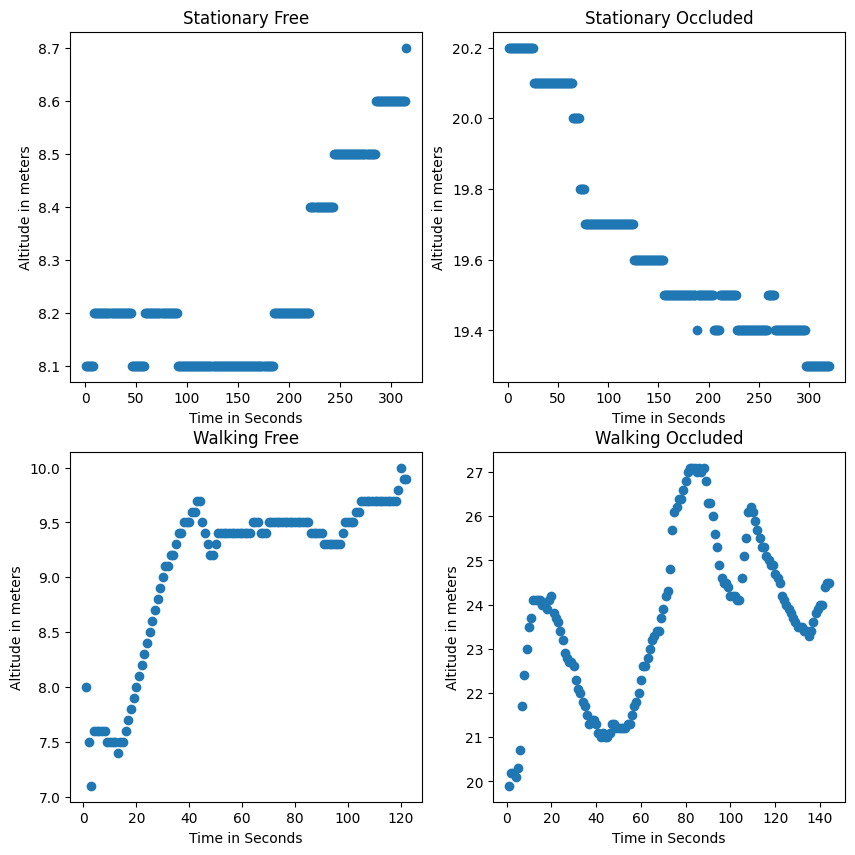

In [101]:
fig , axis = plt.subplots(2,2,figsize = (10,10))

axis[0,0].scatter(x=stattime, y=gpsstaticf[".Altitude"][1:])
axis[0,0].set_title("Stationary Free")
axis[0,0].set_xlabel("Time in Seconds")
axis[0,0].set_ylabel("Altitude in meters")

axis[0,1].scatter(x=stattime1, y=gpsstatico[".Altitude"][1:])
axis[0,1].set_title("Stationary Occluded")
axis[0,1].set_xlabel("Time in Seconds")
axis[0,1].set_ylabel("Altitude in meters")

axis[1,0].scatter(x=stattime2, y=gpswalkingf[".Altitude"][1:])
axis[1,0].set_title("Walking Free")
axis[1,0].set_xlabel("Time in Seconds")
axis[1,0].set_ylabel("Altitude in meters")

axis[1,1].scatter(x=stattime3, y=gpswalkingo[".Altitude"][1:])
axis[1,1].set_title("Walking Occluded")
axis[1,1].set_xlabel("Time in Seconds")
axis[1,1].set_ylabel("Altitude in meters")

plt.show()

RMSE is 0.7542783987671025
Mean is 0.7497483754405961
Median is 0.7528960749152498
RMSE is 3.794299640831517
Mean is 3.793409207532582
Median is 3.805139915362912


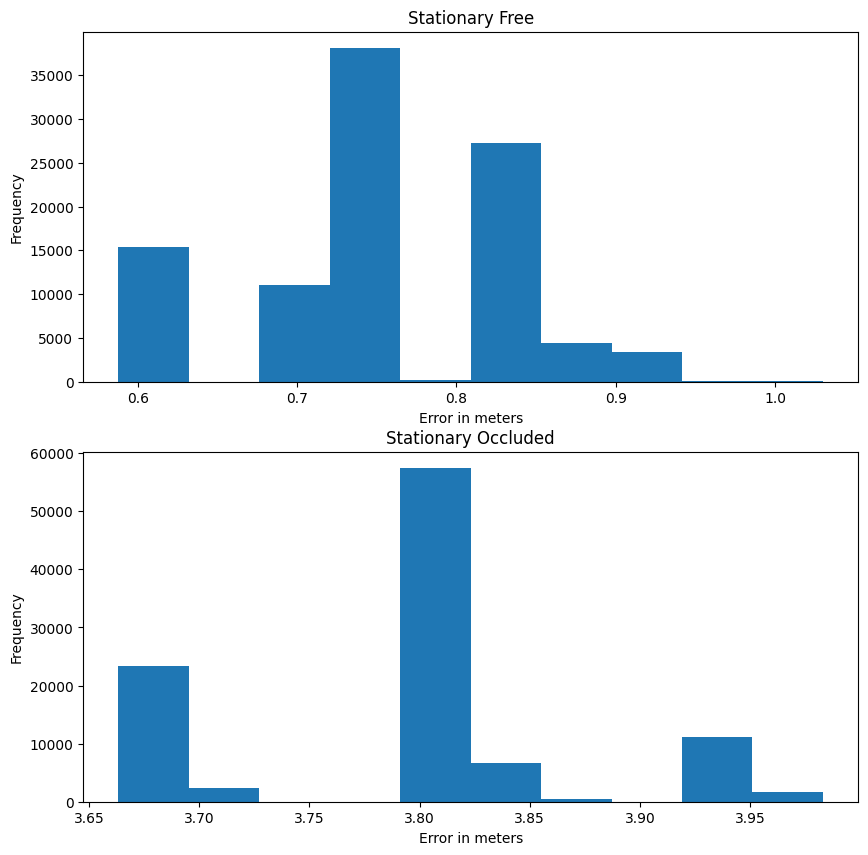

In [178]:
se = []
sm = []
true = utm.from_latlon(42.33908301830847, -71.08468061955281)
for lat in gpsstaticf[".UTM_northing"] :
    for lon in gpsstaticf[".UTM_easting"]:
        se.append(math.sqrt((lat-true[1])**2+ (lon-true[0])**2))
for i in se:
    sm.append(i**2)
RMSE = math.sqrt(sum(sm)/len(se))
print("RMSE is " + str(RMSE))
mean = sum(se)/len(se)
print("Mean is " + str(mean))
se.sort()
mid = len(se) // 2
res = (se[mid] + se[~mid]) / 2
print("Median is " + str(res))
se2 = []
sm2 = []
true = utm.from_latlon(42.33891545311627, -71.08832609071682)
for lat in gpsstatico[".UTM_northing"] :
    for lon in gpsstatico[".UTM_easting"]:
        se2.append(math.sqrt((lat-true[1])**2+ (lon-true[0])**2))
        
for i in se2:
    sm2.append(i**2)
RMSE1 = math.sqrt(sum(sm2)/len(se2))
print("RMSE is " + str(RMSE1))
mean = sum(se2)/len(se2)
print("Mean is " + str(mean))
se2.sort()
mid = len(se) // 2
res = (se2[mid] + se2[~mid]) / 2
print("Median is " + str(res))

fig, ax = plt.subplots(2,figsize =(10, 10))
ax[0].hist(se)
ax[0].set_xlabel("Error in meters")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Stationary Free")
ax[1].hist(se2)
ax[1].set_xlabel("Error in meters")
ax[1].set_ylabel("Frequency")
ax[1].set_title("Stationary Occluded")
# Show plot
plt.show()

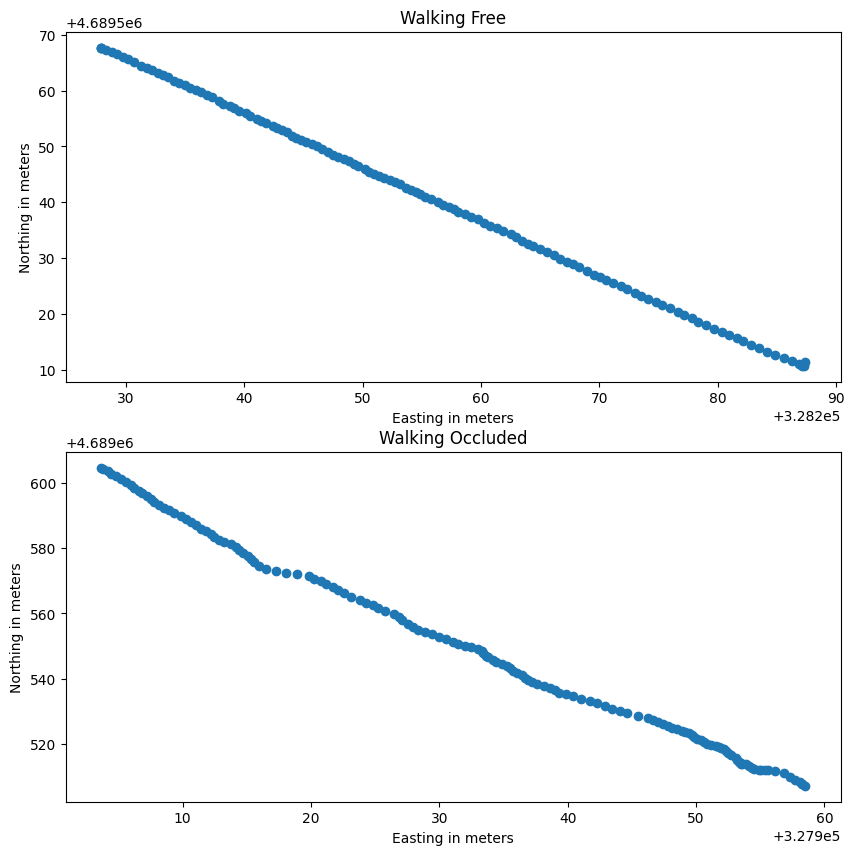

In [106]:
fig ,axis = plt.subplots(2,figsize = (10,10))
axis[0].scatter(x=gpswalkingf[".UTM_easting"][1:], y=gpswalkingf[".UTM_northing"][1:])
axis[0].set_title("Walking Free")
axis[0].set_xlabel("Easting in meters")
axis[0].set_ylabel("Northing in meters")

axis[1].scatter(x=gpswalkingo[".UTM_easting"][1:], y=gpswalkingo[".UTM_northing"][1:])
axis[1].set_title("Walking Occluded")
axis[1].set_xlabel("Easting in meters")
axis[1].set_ylabel("Northing in meters")

plt.show()

Text(0, 0.5, 'Altitude in meters')

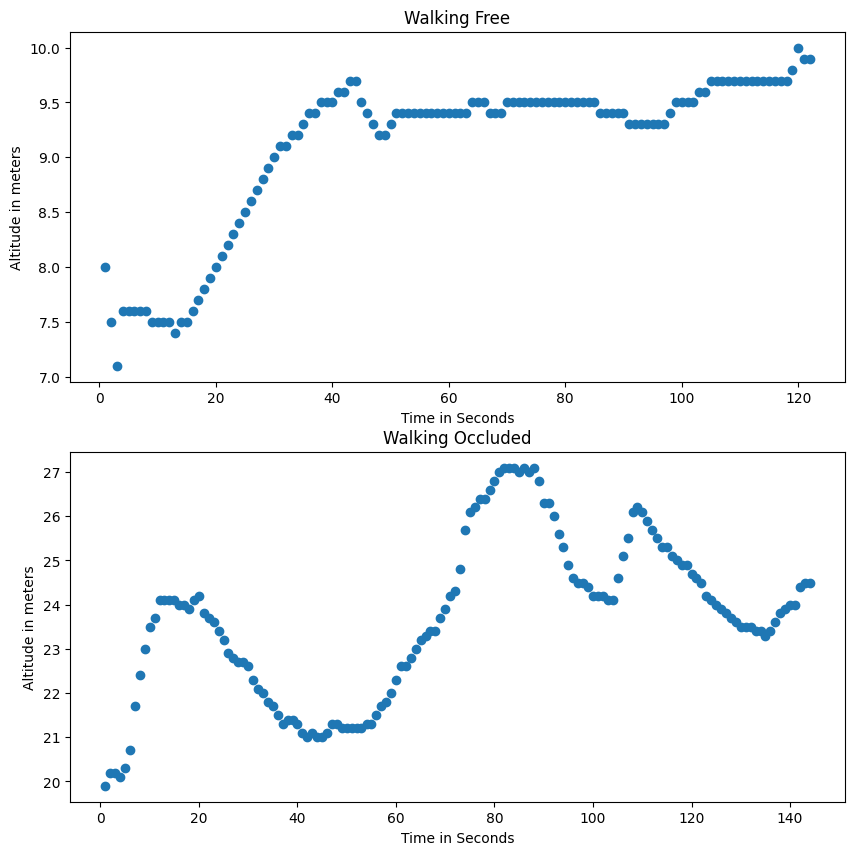

In [108]:
fig ,axis = plt.subplots(2,figsize = (10,10))
axis[0].scatter(x=stattime2, y=gpswalkingf[".Altitude"][1:])
axis[0].set_title("Walking Free")
axis[0].set_xlabel("Time in Seconds")
axis[0].set_ylabel("Altitude in meters")

axis[1].scatter(x=stattime3, y=gpswalkingo[".Altitude"][1:])
axis[1].set_title("Walking Occluded")
axis[1].set_xlabel("Time in Seconds")
axis[1].set_ylabel("Altitude in meters")

y = -0.97007 * x + 5007971.95178


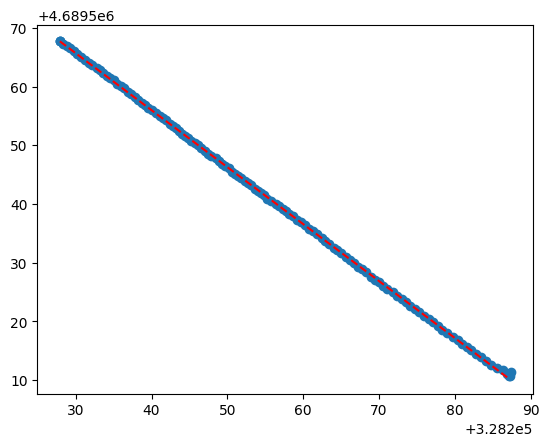

In [140]:
def objective(x, a, b):
    return a * x + b
x, y = gpswalkingf[".UTM_easting"][1:], gpswalkingf[".UTM_northing"][1:]
popt, _ = curve_fit(objective, x, y)
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))
plt.scatter(x, y)
x_line = arange(min(x), max(x), 1)
y_line = objective(x_line, a, b)
plt.plot(x_line, y_line, '--', color='red')
plt.show()

In [169]:
def curve(x):
    y = -0.97007 * x + 5007971.95178
    return y
x, z = gpswalkingf[".UTM_easting"][1:], gpswalkingf[".UTM_northing"][1:]
se = []
for lat in z:
    for lon in x:
        se.append(math.sqrt((curve(lon)-lat)**2))
RMSE = math.sqrt(sum(se)/len(se))
print(RMSE)        

4.41036502266303


y = -1.71161 * x + 5250842.78840


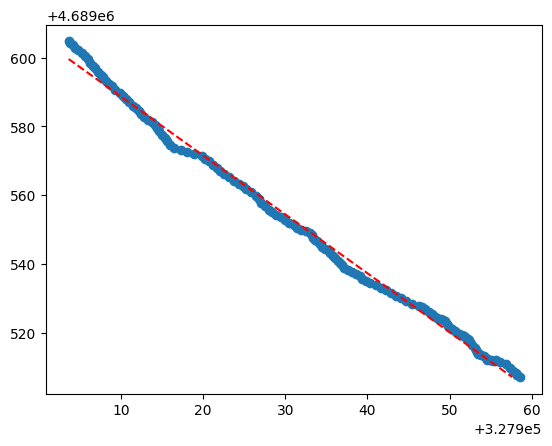

In [158]:
def objective(x, a, b):
    return a * x + b
x, y = gpswalkingo[".UTM_easting"][1:], gpswalkingo[".UTM_northing"][1:]
popt, _ = curve_fit(objective, x, y)
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))
plt.scatter(x, y)
x_line = arange(min(x), max(x), 1)
y_line = objective(x_line, a, b)
plt.plot(x_line, y_line, '--', color='red')
plt.show()

In [170]:
def curve(x):
    y = -1.71161 * x + 5250842.78840
    return y
x, z = gpswalkingo[".UTM_easting"][1:], gpswalkingo[".UTM_northing"][1:]
se = []
for lat in z:
    for lon in x:
        se.append(math.sqrt((curve(lon)-lat)**2))
RMSE = math.sqrt(sum(se)/len(se))
print(RMSE) 

5.797703871342078
